<a href="https://colab.research.google.com/github/VishalSharma2000/student-grade-prediction/blob/main/student_grade_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Student Grade Prediction**

In [2]:
# Importing all the needed libraries 

import numpy as np                      # linear algebra
import pandas as pd                     # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas  as pd                    # Data manipulation
import numpy as np                      # Data manipulation
import matplotlib.pyplot as plt         # Visualization
import seaborn as sns                   #Visualization
pd.set_option('display.max_columns', 500)

from sklearn.model_selection import train_test_split

In [4]:
# Import the data set

df = pd.read_csv('./student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [5]:
# Dimension of the data set

df.shape

(395, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

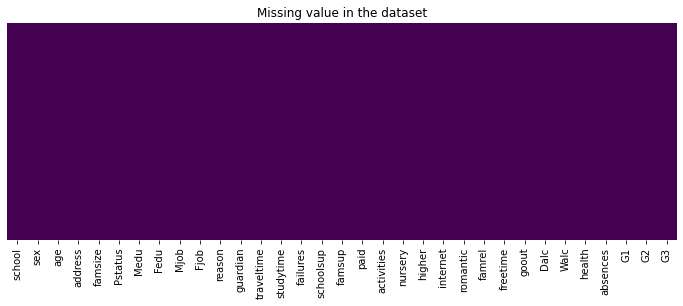

In [9]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

##Correlation between different columns

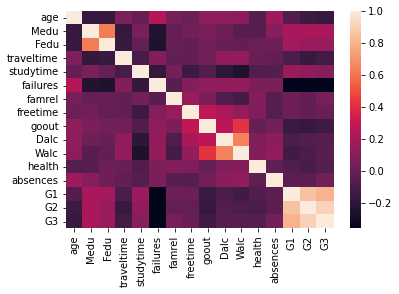

In [10]:
# Correlation Plot

corr = df.corr()
sns.heatmap(corr)

#Train Set and Test Set Split

In [11]:
from sklearn.model_selection import train_test_split
X = df[['G1', 'G2','studytime', 'failures', 'absences']] #Independent variable 
y = df['G3'] #dependent variable 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#**Model Building**

In this step build model using our linear regression equation θ=(XTX)−1XTy . In first step we need to add a feature x0=1 to our original data set.

##**Linear Regression**

In [12]:
from sklearn.linear_model import LinearRegression 

lm = LinearRegression() 

In [13]:
lm.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(lm.intercept_)

-0.9978621713519065


In [18]:
# Prediction

predictions = lm.predict(X_test)
print(predictions)

[12.19145669  9.36516491 12.37073214 13.77898867  7.77532324  6.33191244
  9.66120141 -0.36417216  8.77521771 12.8562228  13.99414071  9.59681401
 15.21257806  9.54104951 11.03372256  9.64460046  7.2794706  10.86303782
 10.86303782  7.61640459  6.11076654  3.77852177 11.7732037  -0.88796068
 -2.3319099  15.59234929  5.36782502 12.78352969 10.74858647  9.84278655
  3.70370286 10.62843457  7.37858606 12.08469046 13.03780794  8.73558526
 11.95042288  8.22476174 10.93017161 16.29996312  9.38498113 11.85257247
 -0.44790689 12.11540708  9.90670506 15.5252155  -0.16598607 10.27915618
 12.1012914   9.56335099 11.6191199  15.59556457 15.21257806  9.84278655
  5.55716481  6.56081514 15.21542833 14.2901772   7.82210023 17.20576304
  6.69508272 16.33638029 15.25989563 15.03099292 12.35322561  8.04778765
 10.7121693   8.67827289  7.90959082 12.80890523  6.78105762 13.74271272
 13.99984125  7.53374885 -0.0208181  11.19870676  7.00003504  8.0983205
  2.39625089 19.66566926 14.30677814  4.40586125  7.

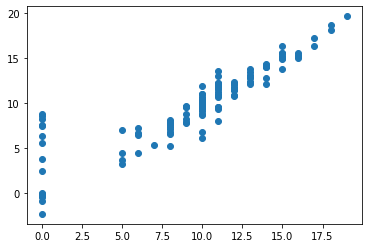

In [19]:
plt.scatter(y_test,predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


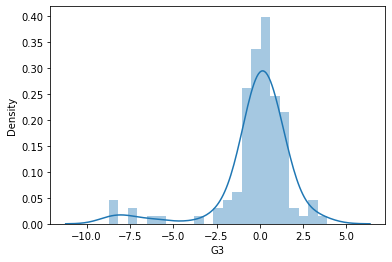

In [20]:
sns.distplot((y_test-predictions)); 

In [21]:
#Finding the accuracy of the model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print(r2_score)

0.7913755341930879
